Encoding with color can be done with both qualitative and quantitative variables.

Depending on what type of data there is, different color palettes should be used. There are three major classes of color palettes:

* Qualitative
* Sequential
* Diverging

![](./Color%20Palettes.png)


Some things to consider when using colors:

* Making sure the colors are compatible with color blind people to not shut out the 8% of the population with color blindness, there are color blindess simualtors that can help determine how color are viewed by people with certain kinds of color blindness, like [here](https://daltonlens.org/colorblindness-simulator)
* It's important to take into account the affect of overlaping in transparency and when there are overlapping between markers that have different colors. Overlapping may generate a third color that can't be found in the origin color palette, which may confuse the viewer of the plot.

![](overlapping.png)

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'

# Load Dataset

In [2]:
df = pd.read_csv('fuel-econ.csv')

## Creating a transmission type column

In [4]:
df['trans_type'] = df['trans'].apply(lambda x:x.split()[0])


## Getting a random susbet from the dataset

In [5]:
np.random.seed(2018)

sample = np.random.choice(df.shape[0], 200, replace=False)
df_subset = df.loc[sample]

# Plot 1: Add Color based on Transmission Type

''

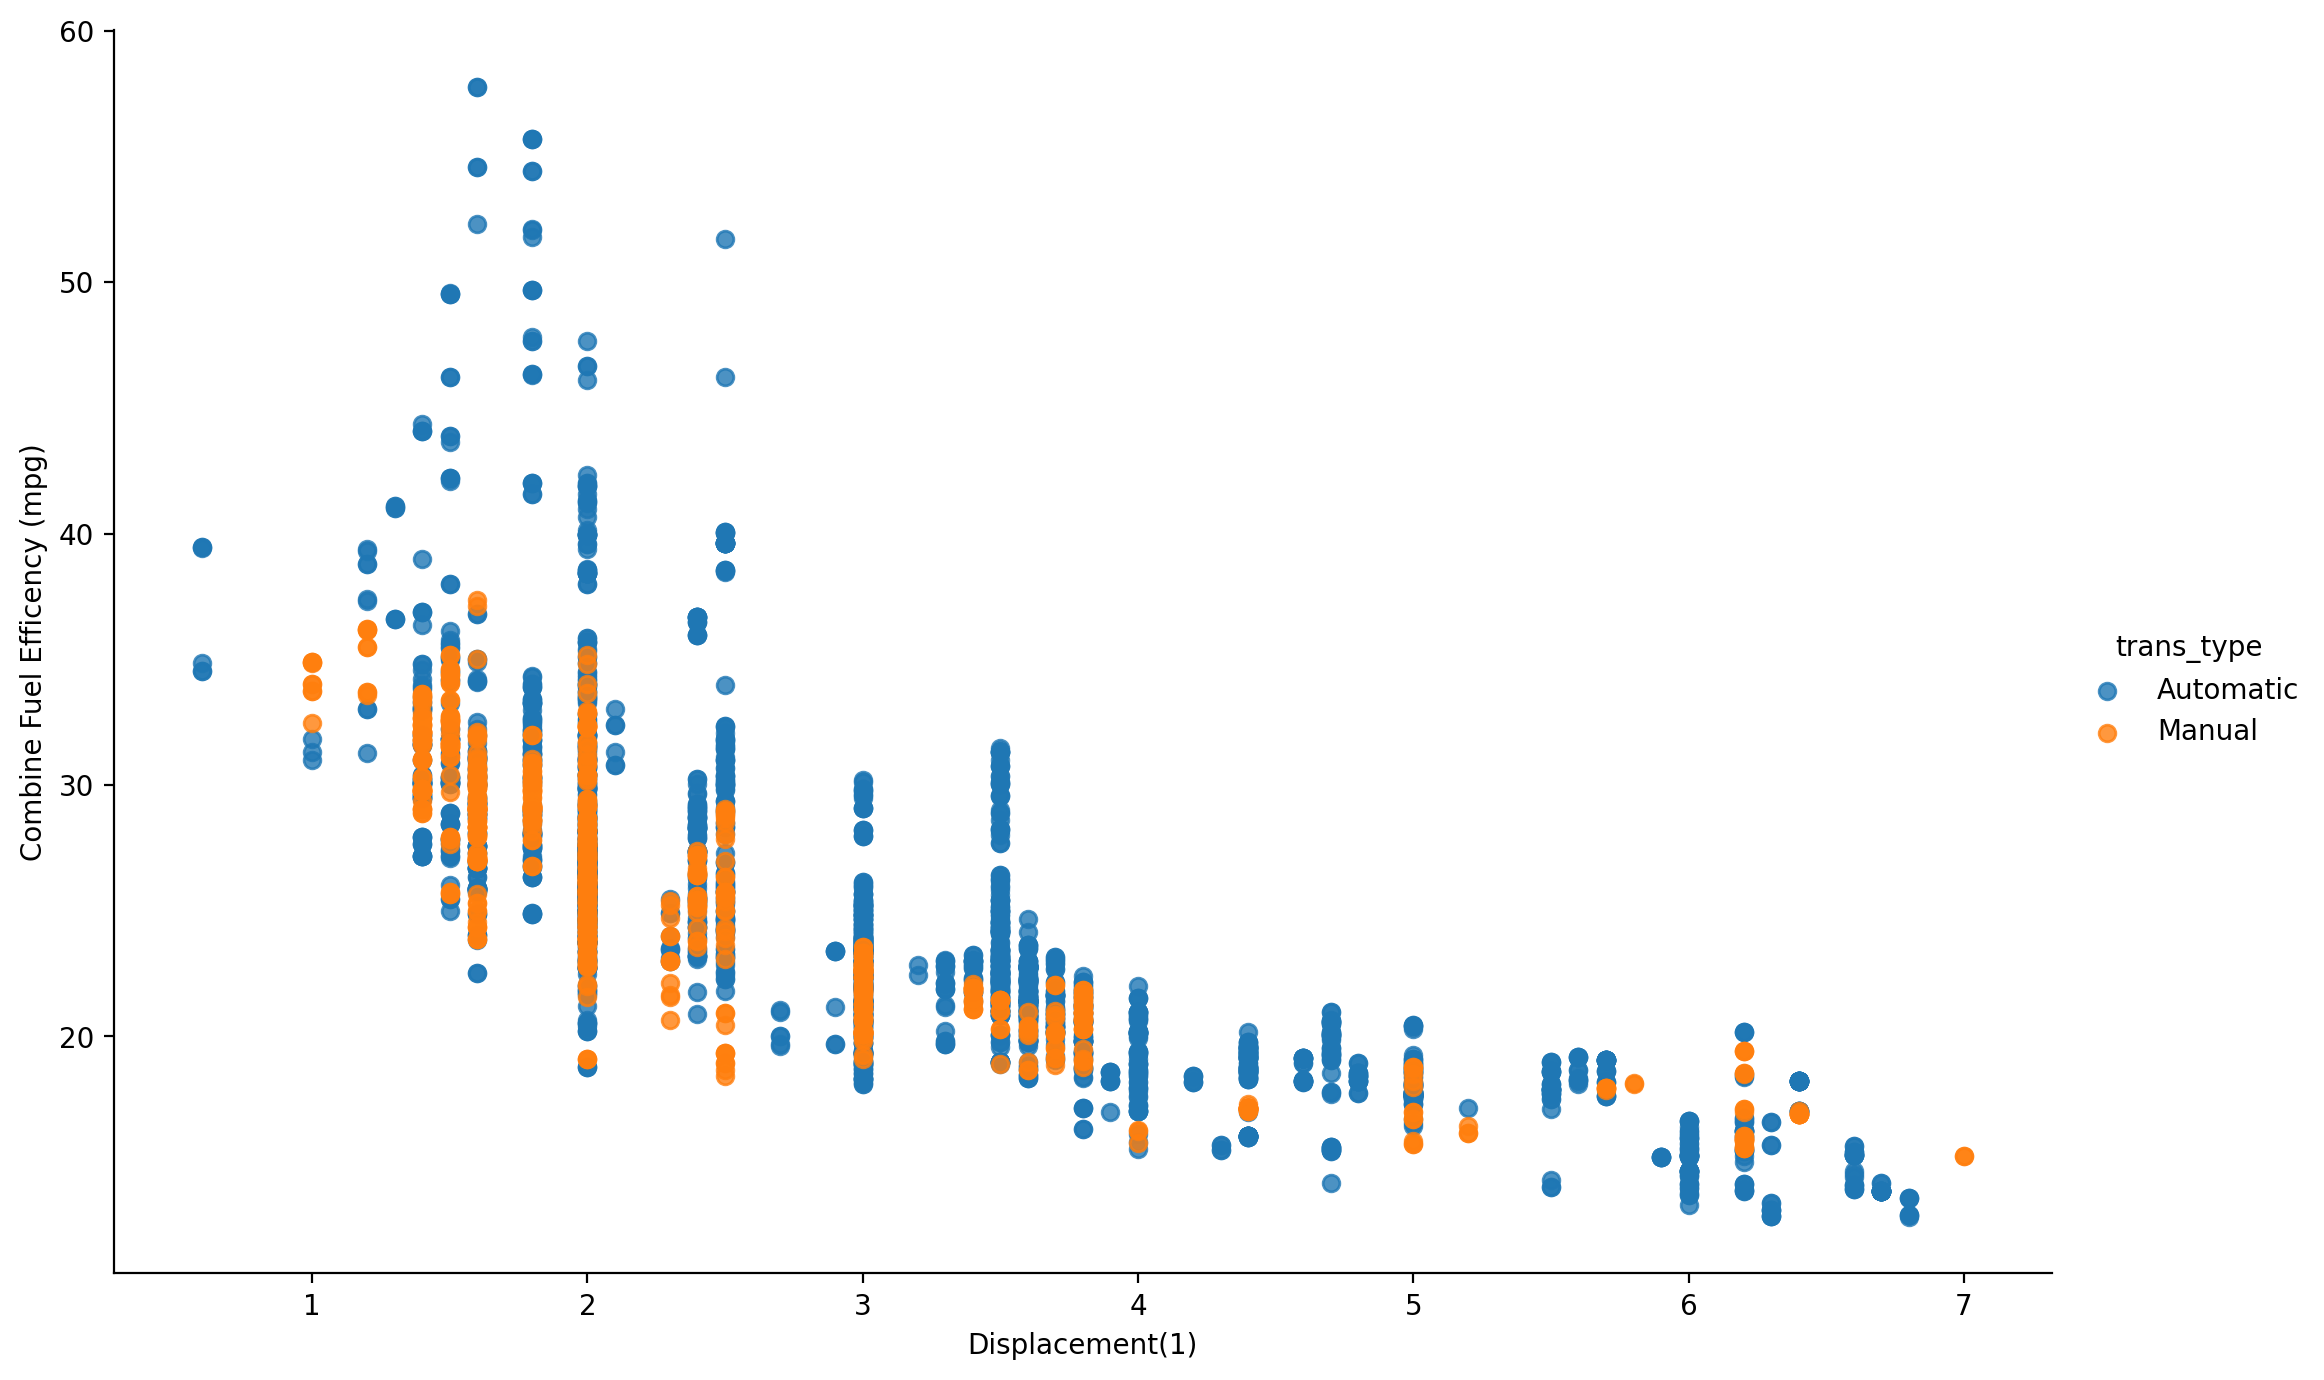

In [9]:
g = sns.FacetGrid(data=df, hue='trans_type', hue_order=['Automatic','Manual'],height=7,aspect=1.5)

g.map(sns.regplot, 'displ','comb',fit_reg=False)
g.add_legend()
plt.xlabel('Displacement(1)')
plt.ylabel('Combine Fuel Efficency (mpg)')
;

# Plot 2: Color based on Vehicle Class

''

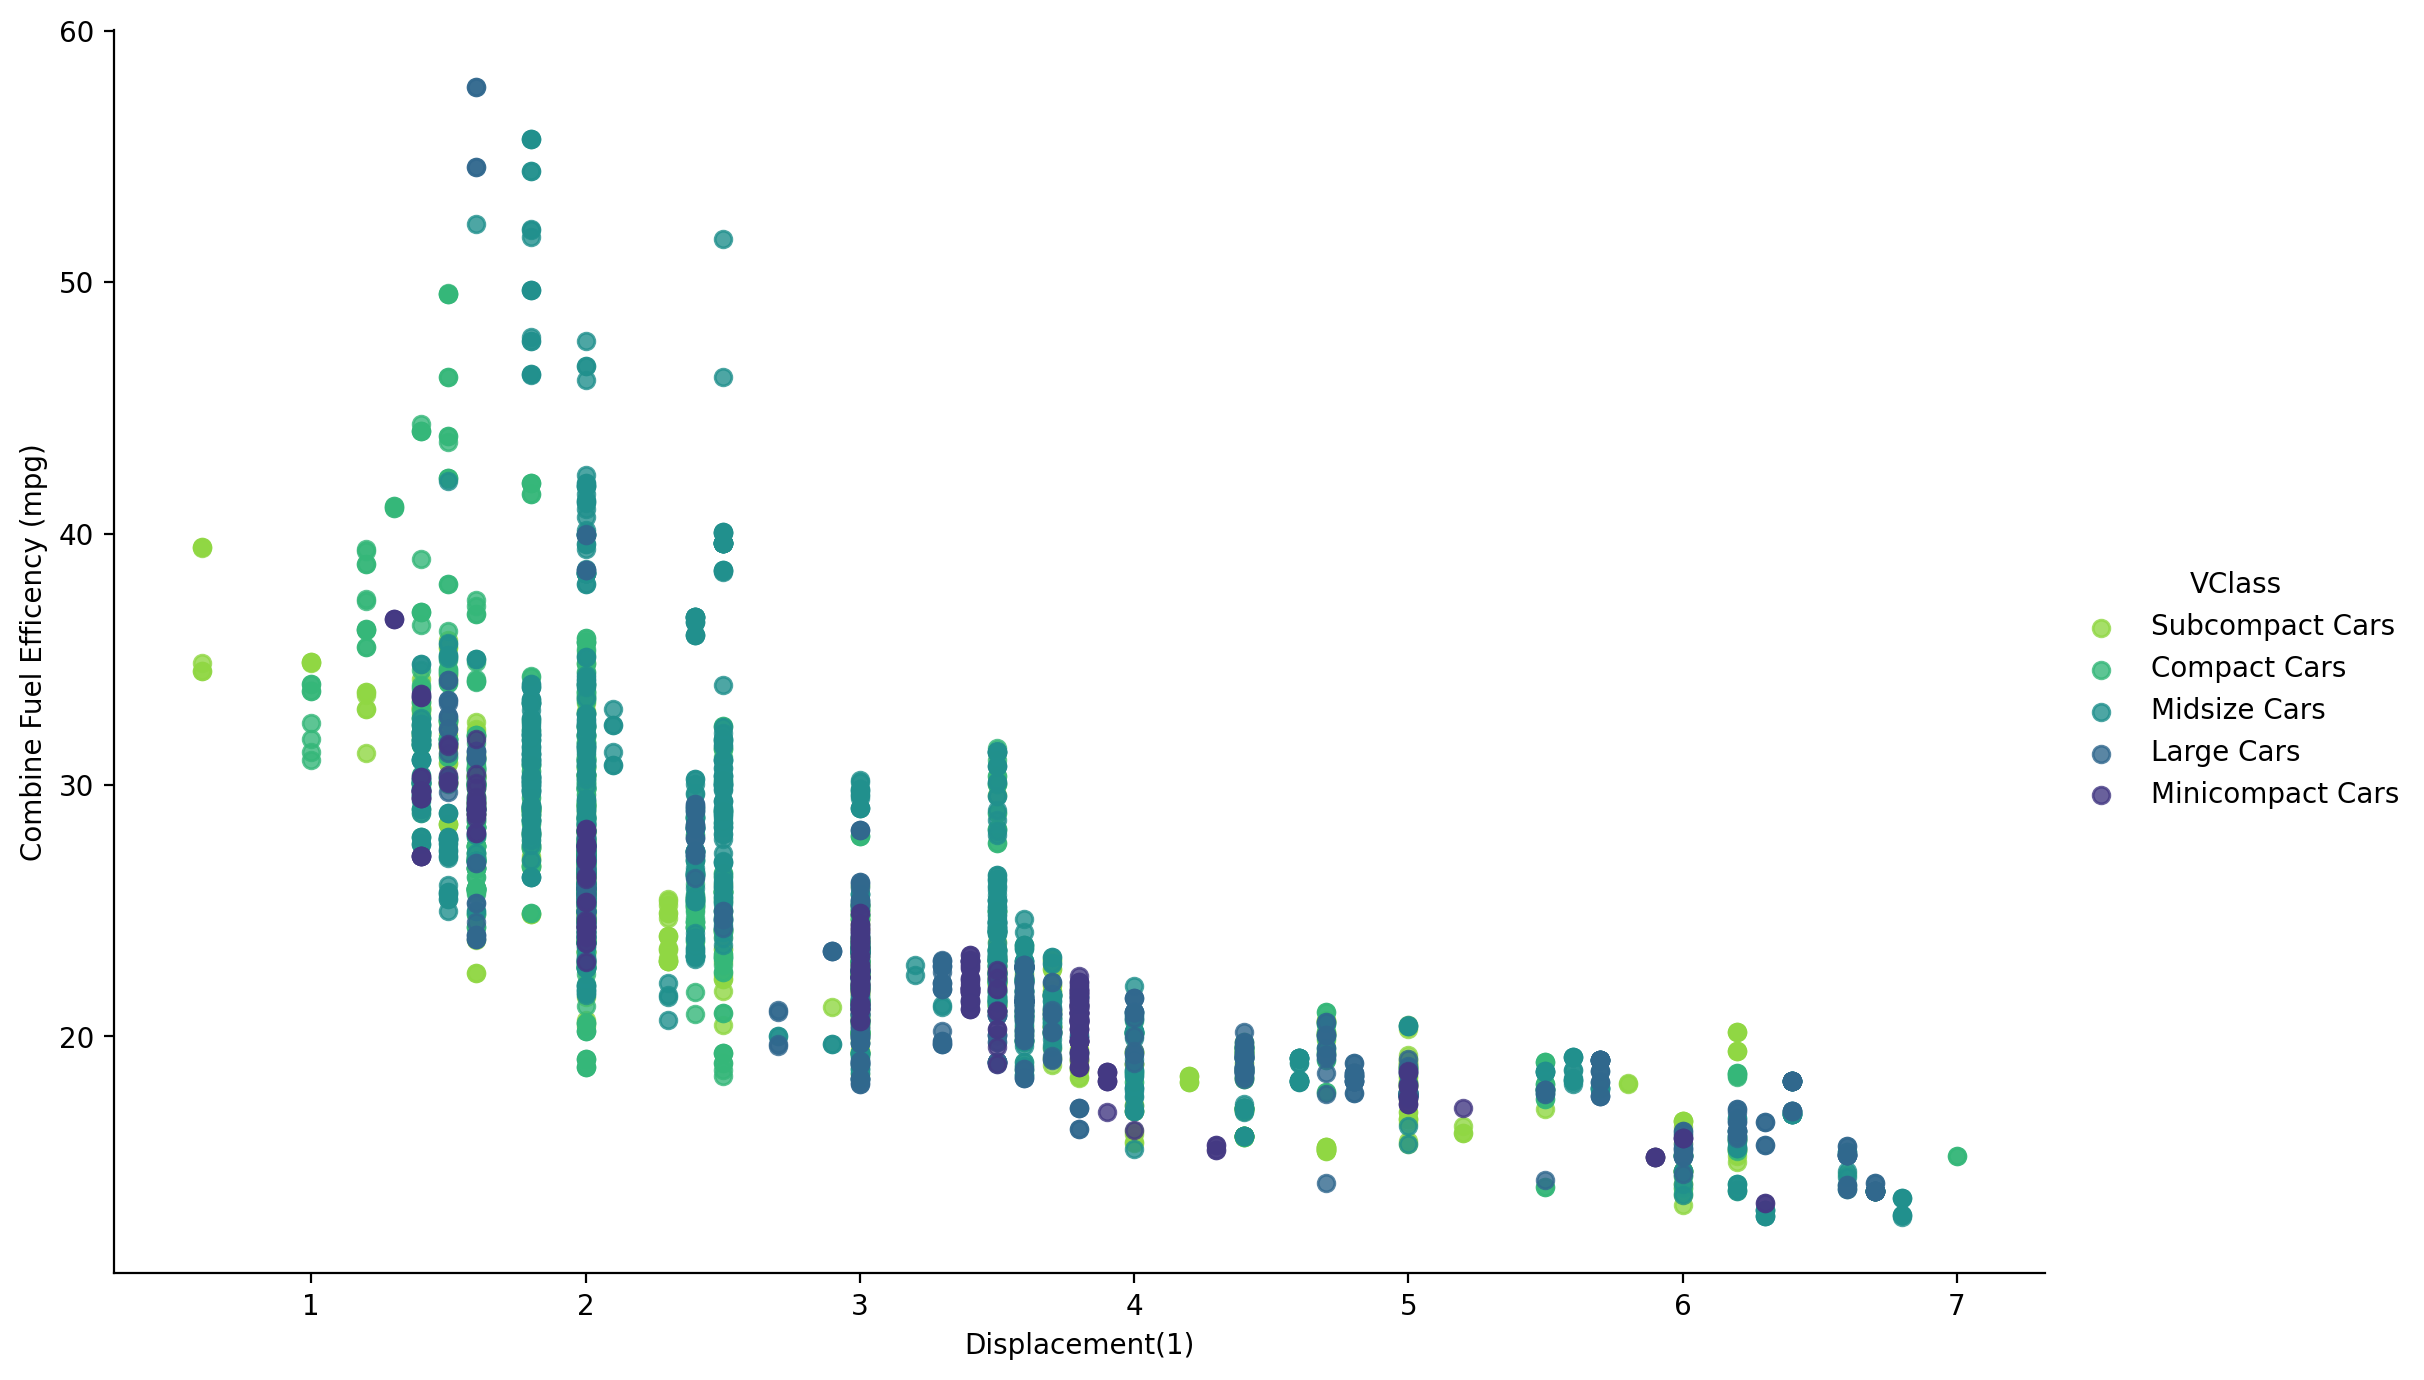

In [11]:
g = sns.FacetGrid(data=df, hue='VClass',height=7, aspect=1.5, palette='viridis_r')

g.map(sns.regplot, 'displ', 'comb', fit_reg=False)
g.add_legend()
plt.xlabel('Displacement(1)')
plt.ylabel('Combine Fuel Efficency (mpg)')
;

# Plot 3: Color based on CO2 Emissions

''

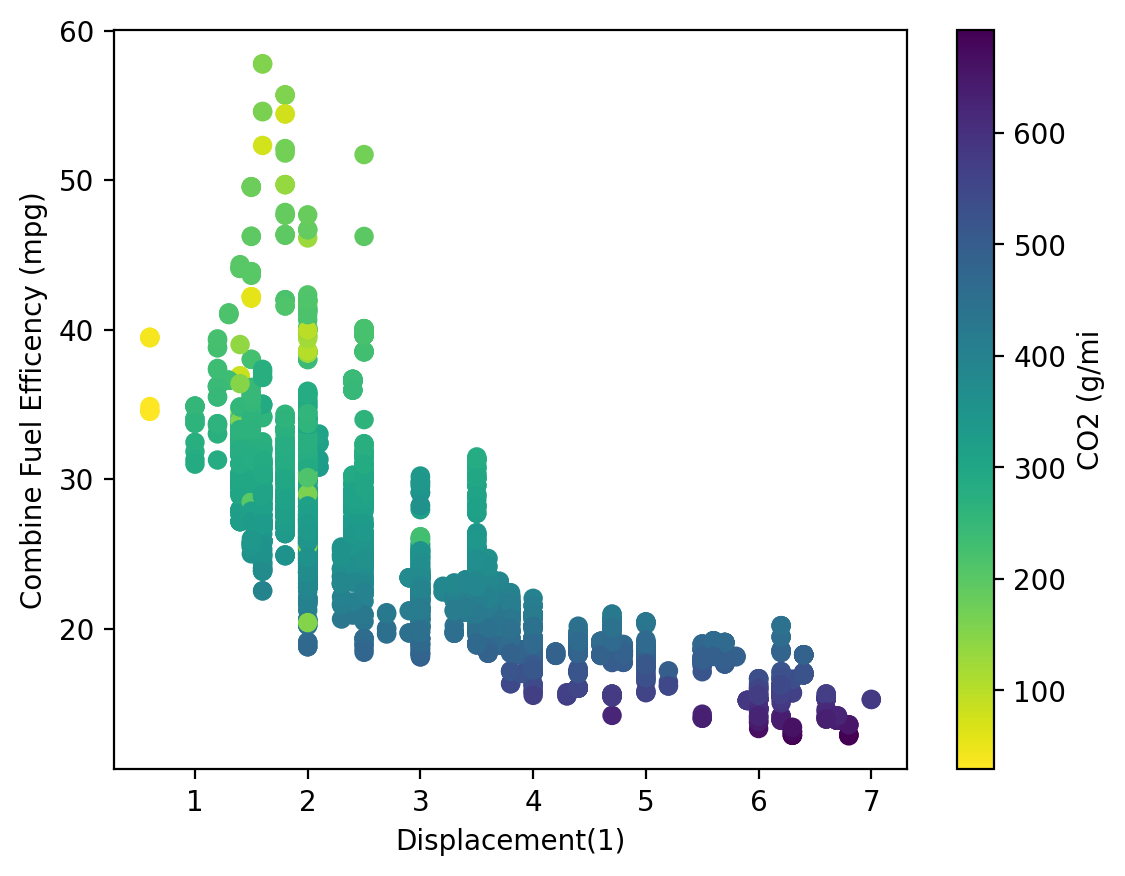

In [14]:
plt.scatter(data=df, x='displ', y='comb', c='co2', cmap='viridis_r')
plt.colorbar(label='CO2 (g/mi)')
plt.xlabel('Displacement(1)')
plt.ylabel('Combine Fuel Efficency (mpg)')
;

# Color Palette Types

Documentation for `color_palette()` can be found [here](https://seaborn.pydata.org/generated/seaborn.color_palette.html)

## Qualitative Color Palettes

These color palettes are built for nominal (categorical) data types. This kind of palette class is used by default. Consecutive color values are unique so that no form of ordering can is implied. Factors such as changes in brightness and saturation should be avoided so that the viewer does not think one color is important that another, unless it is intentional.

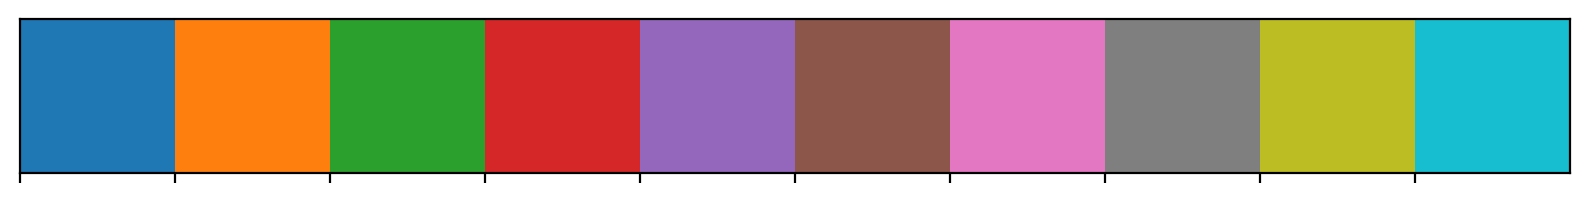

In [17]:
sns.palplot(sns.color_palette(n_colors=10))

## Sequential Palette

Sequential Palettes are usually used for ordinal and numeric data. Usually, a choice is made between a sequential or diverging palette. With a sequential palette, the colors follow each other systematically. This could a be a light to dark trend trend across a single or a small range of hues.

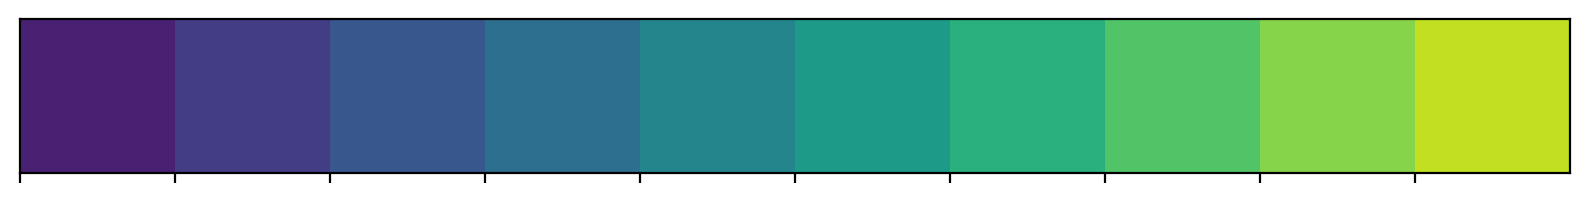

In [21]:
sns.palplot(sns.color_palette('viridis',10))

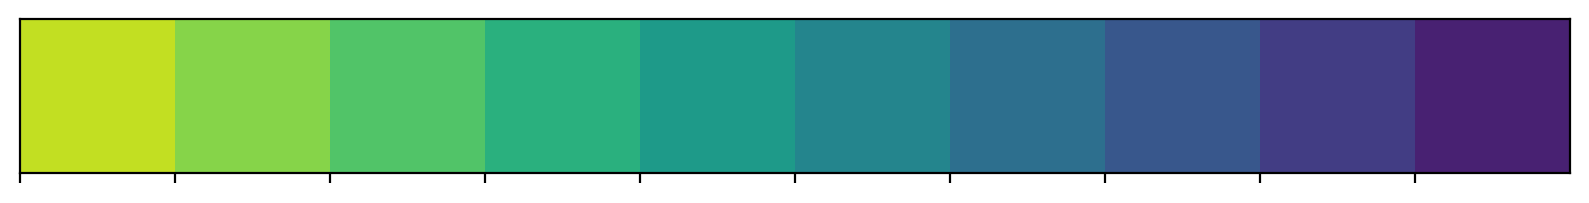

In [22]:
sns.palplot(sns.color_palette('viridis_r',10))

## Diverging Palettes

Sequential palettes can depict ordinal and numeric data fine. However, when there is a meaningful zero or center value for a variable, a diverging palette should be used. The diverging palette uses two sequential palettes back to back with a common color connecting them. One of the indicates a larger value while the other indicates a smaller value than that of the cetner.

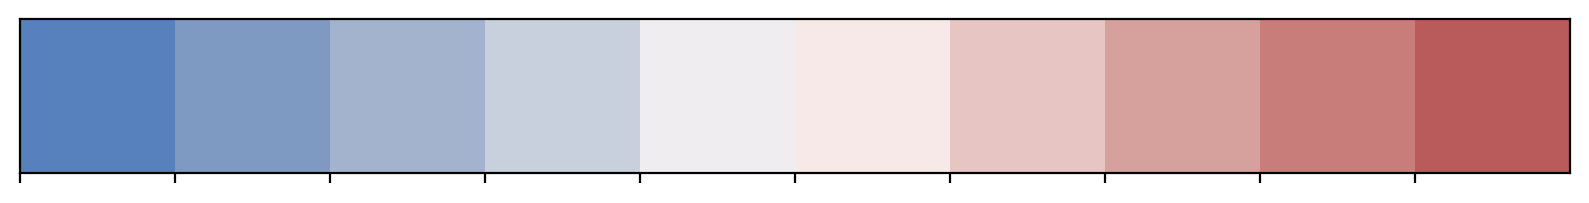

In [23]:
sns.palplot(sns.color_palette('vlag',10))

## Selecting Color Palettes

A color palette in a facet grid is chosen using the `palette` parameter while the `cmap` parameter is used in `scatter()` in matplotlib